## Objective:
- The objective from this project is to create a <b>Logistic Regression Classifier</b> to predict the <b>Stroke Condition</b>.
- <b>Stoke</b> is a condition in which either the blood flow to the brain stops or blood flow is excessive.
- It is required to obtain <b>ROC > 0.65</b>.

### Data:
- Data is provided in csv format in a file named <b>healthcare-dataset-stroke-data.csv</b>

### Column names and data types are as follow:
- id, integer.
- gender, string.
- age, double.
- hypertension, integer.
- heart_disease, integer.
- ever_married, string.
- work_type, string.
- Residence_type, string.
- avg_glucose_level, double.
- bmi, double.
- smoking_status, string.
- stroke, integer <b>(Target Label)</b>.
If the person has stroke the stroke label value is <b>"1"</b> otherwise <b>"0"</b>.

## To perform this task follow the following guiding steps:

### Create a spark session and import the required libraries

In [1]:
import warnings
warnings.filterwarnings("ignore")

import findspark
findspark.init()

import pyspark
from pyspark.sql import SparkSession
from pyspark.sql.types import *
from pyspark.sql.functions import *

import seaborn as sns

spark = SparkSession.builder.appName('Final_Exam').getOrCreate()
spark

21/11/03 15:35:41 WARN Utils: Your hostname, TheDragon resolves to a loopback address: 127.0.1.1; using 192.168.137.88 instead (on interface wlo1)
21/11/03 15:35:41 WARN Utils: Set SPARK_LOCAL_IP if you need to bind to another address
21/11/03 15:35:44 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable
Using Spark's default log4j profile: org/apache/spark/log4j-defaults.properties
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
21/11/03 15:35:47 WARN Utils: Service 'SparkUI' could not bind on port 4040. Attempting port 4041.


### Create a data schema programatically

In [2]:
schema = StructType([StructField("id", IntegerType(), False),
                     StructField("gender", StringType(), False),
                     StructField("age", DoubleType(), False),
                     StructField("hypertension", IntegerType(), False),
                     StructField("heart_disease", IntegerType(), False),
                     StructField("ever_married", StringType(), False),
                     StructField("work_type", StringType(), False),
                     StructField("Residence_type", StringType(), False),
                     StructField("avg_glucose_level", DoubleType(), False),
                     StructField("bmi", DoubleType(), False),
                     StructField("smoking_status", StringType(), False),
                     StructField("stroke", IntegerType(), False)])

### Read the data using the standard DataReader (Key,Value) pairs format
- Provide the schema and any other required options.

In [3]:
df = spark.read.csv("./healthcare-dataset-stroke-data.csv", header=True, schema=schema)

### Explore the data 
#### You have to do the following:
- Print the Schema.
- Show the first 10 rows from the data.
- Explore null values and show how many null values in each column.
- Plot a count plot for the target label and <b>notice the graph</b>.
- Perform any additional EDA you find useful.

In [4]:
df.printSchema()

root
 |-- id: integer (nullable = true)
 |-- gender: string (nullable = true)
 |-- age: double (nullable = true)
 |-- hypertension: integer (nullable = true)
 |-- heart_disease: integer (nullable = true)
 |-- ever_married: string (nullable = true)
 |-- work_type: string (nullable = true)
 |-- Residence_type: string (nullable = true)
 |-- avg_glucose_level: double (nullable = true)
 |-- bmi: double (nullable = true)
 |-- smoking_status: string (nullable = true)
 |-- stroke: integer (nullable = true)



In [5]:
df.show(10)

+-----+------+----+------------+-------------+------------+-------------+--------------+-----------------+----+---------------+------+
|   id|gender| age|hypertension|heart_disease|ever_married|    work_type|Residence_type|avg_glucose_level| bmi| smoking_status|stroke|
+-----+------+----+------------+-------------+------------+-------------+--------------+-----------------+----+---------------+------+
| 9046|  Male|67.0|           0|            1|         Yes|      Private|         Urban|           228.69|36.6|formerly smoked|     1|
|51676|Female|61.0|           0|            0|         Yes|Self-employed|         Rural|           202.21|null|   never smoked|     1|
|31112|  Male|80.0|           0|            1|         Yes|      Private|         Rural|           105.92|32.5|   never smoked|     1|
|60182|Female|49.0|           0|            0|         Yes|      Private|         Urban|           171.23|34.4|         smokes|     1|
| 1665|Female|79.0|           1|            0|         

In [6]:
Null_columns = []
for column in df.columns:
    Null_count = df.filter(col(column).isNull()).count()
    if Null_count != 0:
        Null_columns.append((column, Null_count))

In [7]:
Null_columns

[('bmi', 201)]

In [8]:
Null_columns_df  = spark.createDataFrame(Null_columns, ['Column', 'Missing_value'])
Null_columns_df.show()

+------+-------------+
|Column|Missing_value|
+------+-------------+
|   bmi|          201|
+------+-------------+



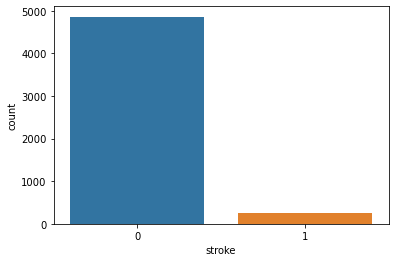

In [9]:
stroke = df.toPandas()['stroke']
sns.countplot(stroke);

### Get the summary statistics of the age column
- You will find the minimum age is about <b>0.08</b>.
- Remove rows for the age below <b>2 years old</b>.

In [10]:
df.describe(['age']).show()

+-------+------------------+
|summary|               age|
+-------+------------------+
|  count|              5110|
|   mean|43.226614481409015|
| stddev| 22.61264672311348|
|    min|              0.08|
|    max|              82.0|
+-------+------------------+



In [11]:
df.createOrReplaceTempView("df_view")
df_age_large_than_2 = spark.sql("SELECT * FROM df_view WHERE age >= 2")

In [12]:
df_age_large_than_2.show()

+-----+------+----+------------+-------------+------------+-------------+--------------+-----------------+----+---------------+------+
|   id|gender| age|hypertension|heart_disease|ever_married|    work_type|Residence_type|avg_glucose_level| bmi| smoking_status|stroke|
+-----+------+----+------------+-------------+------------+-------------+--------------+-----------------+----+---------------+------+
| 9046|  Male|67.0|           0|            1|         Yes|      Private|         Urban|           228.69|36.6|formerly smoked|     1|
|51676|Female|61.0|           0|            0|         Yes|Self-employed|         Rural|           202.21|null|   never smoked|     1|
|31112|  Male|80.0|           0|            1|         Yes|      Private|         Rural|           105.92|32.5|   never smoked|     1|
|60182|Female|49.0|           0|            0|         Yes|      Private|         Urban|           171.23|34.4|         smokes|     1|
| 1665|Female|79.0|           1|            0|         

### Working with gender & smoking_status columns:
- Select and show the gender & smoking_status columns
- Get the distinct values for each column.

In [13]:
df_age_large_than_2.createOrReplaceTempView("df_age_large_than_2_view")

spark.sql("""
SELECT gender, smoking_status
FROM df_age_large_than_2_view""").show()

+------+---------------+
|gender| smoking_status|
+------+---------------+
|  Male|formerly smoked|
|Female|   never smoked|
|  Male|   never smoked|
|Female|         smokes|
|Female|   never smoked|
|  Male|formerly smoked|
|  Male|   never smoked|
|Female|   never smoked|
|Female|        Unknown|
|Female|        Unknown|
|Female|   never smoked|
|Female|         smokes|
|Female|         smokes|
|  Male|        Unknown|
|Female|   never smoked|
|Female|   never smoked|
|  Male|         smokes|
|  Male|         smokes|
|Female|   never smoked|
|  Male|        Unknown|
+------+---------------+
only showing top 20 rows



In [14]:
spark.sql("""
SELECT distinct(gender)
FROM df_age_large_than_2_view""").show()

+------+
|gender|
+------+
|Female|
| Other|
|  Male|
+------+



In [15]:
spark.sql("""
SELECT distinct(smoking_status)
FROM df_age_large_than_2_view""").show()

+---------------+
| smoking_status|
+---------------+
|         smokes|
|        Unknown|
|   never smoked|
|formerly smoked|
+---------------+



#### Change the string values of the columns into numerical values as follow:
1. Gender column:
    * Male = 1 
    * Female = 0 
    * Other = 0 
2. Smoking Status column:
  * never smoked = 0
  * Unknown = 0.5
  * formerly smoked = 0.75
  * smokes = 1.0


In [16]:
def gender_fun(col):
    if col == 'Male':
        return 1
    else:
        return 0

In [17]:
def smoking_status_fun(col):
    if col == 'never smoked':
        return 0.0
    elif col == 'Unknown':
        return 0.5
    elif col == 'formerly smoked':
        return 0.75
    else:
        return 1.0

In [18]:
gender_udf_fun = udf(lambda val: gender_fun(val), IntegerType())
df_after_edit_gender = df_age_large_than_2.withColumn('gender', gender_udf_fun('gender'))

smoking_status_udf_fun = udf(lambda val: smoking_status_fun(val), DoubleType())
df_after_edit_gender_and_smoking_status = df_after_edit_gender.withColumn('smoking_status',\
                                                                          smoking_status_udf_fun('smoking_status'))

In [19]:
df_after_edit_gender_and_smoking_status.show()

+-----+------+----+------------+-------------+------------+-------------+--------------+-----------------+----+--------------+------+
|   id|gender| age|hypertension|heart_disease|ever_married|    work_type|Residence_type|avg_glucose_level| bmi|smoking_status|stroke|
+-----+------+----+------------+-------------+------------+-------------+--------------+-----------------+----+--------------+------+
| 9046|     1|67.0|           0|            1|         Yes|      Private|         Urban|           228.69|36.6|          0.75|     1|
|51676|     0|61.0|           0|            0|         Yes|Self-employed|         Rural|           202.21|null|           0.0|     1|
|31112|     1|80.0|           0|            1|         Yes|      Private|         Rural|           105.92|32.5|           0.0|     1|
|60182|     0|49.0|           0|            0|         Yes|      Private|         Urban|           171.23|34.4|           1.0|     1|
| 1665|     0|79.0|           1|            0|         Yes|Sel

#### Show the output DataFrame
- Select and show the gender & smoking_status columns after value changing.
- Print schema for the new dataframe.

In [20]:
df_after_edit_gender_and_smoking_status.select('gender', 'smoking_status').show()

+------+--------------+
|gender|smoking_status|
+------+--------------+
|     1|          0.75|
|     0|           0.0|
|     1|           0.0|
|     0|           1.0|
|     0|           0.0|
|     1|          0.75|
|     1|           0.0|
|     0|           0.0|
|     0|           0.5|
|     0|           0.5|
|     0|           0.0|
|     0|           1.0|
|     0|           1.0|
|     1|           0.5|
|     0|           0.0|
|     0|           0.0|
|     1|           1.0|
|     1|           1.0|
|     0|           0.0|
|     1|           0.5|
+------+--------------+
only showing top 20 rows



In [21]:
df_after_edit_gender_and_smoking_status.printSchema()

root
 |-- id: integer (nullable = true)
 |-- gender: integer (nullable = true)
 |-- age: double (nullable = true)
 |-- hypertension: integer (nullable = true)
 |-- heart_disease: integer (nullable = true)
 |-- ever_married: string (nullable = true)
 |-- work_type: string (nullable = true)
 |-- Residence_type: string (nullable = true)
 |-- avg_glucose_level: double (nullable = true)
 |-- bmi: double (nullable = true)
 |-- smoking_status: double (nullable = true)
 |-- stroke: integer (nullable = true)



### Deal with null value according to your data analysis.

In [22]:
bmi_median = df_after_edit_gender_and_smoking_status.approxQuantile('bmi', [0.25], 0.25)[0]
bmi_median

11.3

In [23]:
final_df = df_after_edit_gender_and_smoking_status.fillna(bmi_median, subset=['bmi'])

### Split the data into training and test dataframes:
- 80% training and 20% test.
- seed = 42.
- Save each dataframe as a parquet file

In [24]:
trainDF, testDF = final_df.randomSplit([0.8, 0.2], seed = 42)

In [25]:
trainDF.write.parquet('trainDF_parquet')
testDF.write.parquet('testDF_parquet')

### Read the saved Train and Test DataFrame:
- Use the dataframes you read in the subsequent steps.

In [26]:
trainDF = spark.read.parquet('trainDF_parquet')
testDF = spark.read.parquet('testDF_parquet')

### Create the model:
- Perform feature engineering steps.
- Create the logistic regression classifier.
- Build the pipeline model that uses all feature engineering steps and the model.
- Train the pipeline model using the trainig dataset.

In [27]:
from pyspark.ml.feature import VectorAssembler # Transformer
from pyspark.ml import Pipeline
from pyspark.ml.feature import StringIndexer, OneHotEncoder
from pyspark.ml.classification import LogisticRegression

In [28]:
trainDF.dtypes

[('id', 'int'),
 ('gender', 'int'),
 ('age', 'double'),
 ('hypertension', 'int'),
 ('heart_disease', 'int'),
 ('ever_married', 'string'),
 ('work_type', 'string'),
 ('Residence_type', 'string'),
 ('avg_glucose_level', 'double'),
 ('bmi', 'double'),
 ('smoking_status', 'double'),
 ('stroke', 'int')]

In [29]:
cat_features = [col for (col, dtype) in trainDF.dtypes if (dtype == 'string') ]

In [30]:
cat_features

['ever_married', 'work_type', 'Residence_type']

In [31]:
indexed_out_cols = [x + "_index" for x in cat_features] 

In [32]:
stringIndexObject = StringIndexer(inputCols=cat_features, outputCols=indexed_out_cols, handleInvalid='skip')

In [33]:
ohe_out_cols = [x + "_OHE" for x in cat_features] 

In [34]:
OHEObject = OneHotEncoder(inputCols=indexed_out_cols, outputCols=ohe_out_cols)

In [35]:
numCols = [col for (col, dtype) in trainDF.dtypes if (((dtype == 'double') | (dtype == 'int'))\
                                                      & ((col != 'stroke') & (col != 'id')))]

In [36]:
numCols

['gender',
 'age',
 'hypertension',
 'heart_disease',
 'avg_glucose_level',
 'bmi',
 'smoking_status']

In [37]:
assembler_cols = numCols + ohe_out_cols 
assembler_cols

['gender',
 'age',
 'hypertension',
 'heart_disease',
 'avg_glucose_level',
 'bmi',
 'smoking_status',
 'ever_married_OHE',
 'work_type_OHE',
 'Residence_type_OHE']

In [38]:
vectorAssemberObj = VectorAssembler(inputCols = assembler_cols, outputCol = 'features')

In [39]:
log_reg = LogisticRegression(featuresCol = 'features', labelCol = 'stroke')

In [40]:
pipeline = Pipeline(stages=[stringIndexObject, OHEObject, vectorAssemberObj, log_reg])

In [41]:
pipelineModel = pipeline.fit(trainDF) # Transformer

21/11/03 15:36:42 WARN BLAS: Failed to load implementation from: com.github.fommil.netlib.NativeSystemBLAS
21/11/03 15:36:42 WARN BLAS: Failed to load implementation from: com.github.fommil.netlib.NativeRefBLAS


### Perform predictions on tests dataframe:
- Test the model using the test dataframe
- Select and show the feature column.
- Print the schema of the output dataframe.
- Select and show both prediction and label columns.
- Explore the results for the label column stroke=1. i.e. select both columns (prediction,stroke) for stroke=1.<b>notice the result.</b> 
- Count the predicted 1 and 0 values.<b>notice the result.</b>   

In [42]:
predDF = pipelineModel.transform(testDF) 

In [43]:
predDF.select('features').show(truncate=False)

+-----------------------------------------------------------+
|features                                                   |
+-----------------------------------------------------------+
|(13,[0,1,4,5,7,8,12],[1.0,55.0,89.17,31.5,1.0,1.0,1.0])    |
|(13,[1,4,5,8,12],[24.0,97.55,26.2,1.0,1.0])                |
|(13,[1,4,5,7,8],[33.0,86.97,42.2,1.0,1.0])                 |
|(13,[1,4,5,6,7,8],[43.0,88.23,37.6,0.5,1.0,1.0])           |
|(13,[0,1,4,5,7,8,12],[1.0,79.0,198.79,24.9,1.0,1.0,1.0])   |
|(13,[1,4,5,7,8],[43.0,110.32,28.4,1.0,1.0])                |
|(13,[0,1,2,4,5,7,9],[1.0,78.0,1.0,75.19,27.6,1.0,1.0])     |
|(13,[1,4,5,7,9,12],[74.0,74.96,26.6,1.0,1.0,1.0])          |
|(13,[1,4,5,6,11],[14.0,92.22,22.8,0.5,1.0])                |
|(13,[0,1,4,5,6,7,8],[1.0,69.0,101.52,26.8,1.0,1.0,1.0])    |
|(13,[0,1,4,5,6,7,10],[1.0,52.0,87.26,40.1,1.0,1.0,1.0])    |
|(13,[1,2,3,4,5,6,8],[82.0,1.0,1.0,84.03,26.5,0.75,1.0])    |
|(13,[0,1,4,5,8],[1.0,17.0,81.77,44.7,1.0])                 |
|(13,[1,

In [44]:
predDF.printSchema()

root
 |-- id: integer (nullable = true)
 |-- gender: integer (nullable = true)
 |-- age: double (nullable = true)
 |-- hypertension: integer (nullable = true)
 |-- heart_disease: integer (nullable = true)
 |-- ever_married: string (nullable = true)
 |-- work_type: string (nullable = true)
 |-- Residence_type: string (nullable = true)
 |-- avg_glucose_level: double (nullable = true)
 |-- bmi: double (nullable = true)
 |-- smoking_status: double (nullable = true)
 |-- stroke: integer (nullable = true)
 |-- ever_married_index: double (nullable = false)
 |-- work_type_index: double (nullable = false)
 |-- Residence_type_index: double (nullable = false)
 |-- ever_married_OHE: vector (nullable = true)
 |-- work_type_OHE: vector (nullable = true)
 |-- Residence_type_OHE: vector (nullable = true)
 |-- features: vector (nullable = true)
 |-- rawPrediction: vector (nullable = true)
 |-- probability: vector (nullable = true)
 |-- prediction: double (nullable = false)



In [45]:
predDF.select("stroke", "prediction").show(truncate=False)

+------+----------+
|stroke|prediction|
+------+----------+
|0     |0.0       |
|0     |0.0       |
|0     |0.0       |
|0     |0.0       |
|0     |0.0       |
|0     |0.0       |
|0     |0.0       |
|1     |0.0       |
|0     |0.0       |
|0     |0.0       |
|0     |0.0       |
|1     |0.0       |
|0     |0.0       |
|0     |0.0       |
|0     |0.0       |
|0     |0.0       |
|0     |0.0       |
|0     |0.0       |
|0     |0.0       |
|0     |0.0       |
+------+----------+
only showing top 20 rows



In [46]:
predDF.select('stroke', 'prediction').filter('stroke = 1').show()

+------+----------+
|stroke|prediction|
+------+----------+
|     1|       0.0|
|     1|       0.0|
|     1|       0.0|
|     1|       0.0|
|     1|       0.0|
|     1|       0.0|
|     1|       0.0|
|     1|       0.0|
|     1|       0.0|
|     1|       0.0|
|     1|       0.0|
|     1|       0.0|
|     1|       0.0|
|     1|       0.0|
|     1|       0.0|
|     1|       0.0|
|     1|       0.0|
|     1|       0.0|
|     1|       0.0|
|     1|       0.0|
+------+----------+
only showing top 20 rows



In [47]:
predDF.groupBy("prediction").count().show()

+----------+-----+
|prediction|count|
+----------+-----+
|       0.0|  953|
+----------+-----+



### Evaluate the model performance
- Use <b>BinaryClassificationEvaluator</b>. This will calculate the <b>ROC</b>.
- Set the parameters as follow:
    - <b>rawPredictionCol='prediction'</b> and <b>labelCol='stroke'</b>

In [48]:
from pyspark.ml.evaluation import BinaryClassificationEvaluator

In [49]:
evaluatorROC = BinaryClassificationEvaluator(rawPredictionCol='prediction'
                                             ,labelCol='stroke')

In [50]:
evaluatorROC.evaluate(predDF)

0.5

### Improve Model Performance
- You may noticed that <b>the target label is imbalanced</b>.
- LogisticRegression classifier has a special parameter <b>weightCol</b> to deal with imbalanced class.
- In order to use this parameter you must have a <b>weightCol</b> in your training dataframe.
- In order to create this column you will need to define a <b>UDF</b> and apply it to the target label column.
- Create a LogisticRegression classifier with <b>weightCol</b> parameter.
- Build and train a pipeline model with the new LogisticRegression.
- Perform the prediction on the test dataframe. 
- Select and show both prediction and label columns.
- Explore the results for the label column stroke=1. i.e. select both columns (prediction,stroke) for stroke=1.<b>notice the result.</b> 
- Count the predicted 1 and 0 values.<b>notice the result.</b>   
- Evaluate the model performance exactly as in the previous step.
### YOU SHOULD OBTAIN  ROC > 0.65
<BR>
<b><font color='red'>Note: feel free to deal with the imbalanced cluster with the above method or another. However, you can only use methods applied on SPARK DATAFRAME</font></b>

In [51]:
one_counts = trainDF.groupBy("stroke").count().collect()[0][1]
zero_counts = trainDF.groupBy("stroke").count().collect()[1][1]

In [52]:
train_counts = zero_counts + one_counts
ratio_of_zeros = zero_counts / train_counts
ratio_of_ones = one_counts / train_counts

In [53]:
ratio_of_zeros

0.9499628436958137

In [54]:
ratio_of_ones

0.05003715630418628

In [55]:
def weighted_col_fun(col):
    if col == 0:
        return ratio_of_ones
    else:
        return ratio_of_zeros

In [56]:
weighted_col_udf_fun = udf(lambda val: weighted_col_fun(val), DoubleType())
trainDF_with_weight = trainDF.withColumn('weighted_col', weighted_col_udf_fun('stroke'))

In [57]:
trainDF_with_weight.select('stroke', 'weighted_col').show(truncate=False)

+------+-------------------+
|stroke|weighted_col       |
+------+-------------------+
|0     |0.05003715630418628|
|0     |0.05003715630418628|
|0     |0.05003715630418628|
|0     |0.05003715630418628|
|0     |0.05003715630418628|
|0     |0.05003715630418628|
|0     |0.05003715630418628|
|0     |0.05003715630418628|
|0     |0.05003715630418628|
|0     |0.05003715630418628|
|1     |0.9499628436958137 |
|0     |0.05003715630418628|
|0     |0.05003715630418628|
|0     |0.05003715630418628|
|0     |0.05003715630418628|
|0     |0.05003715630418628|
|0     |0.05003715630418628|
|0     |0.05003715630418628|
|0     |0.05003715630418628|
|0     |0.05003715630418628|
+------+-------------------+
only showing top 20 rows



In [58]:
log_reg2 = LogisticRegression(featuresCol = 'features', labelCol = 'stroke', weightCol = 'weighted_col')

In [59]:
pipeline2 = Pipeline(stages=[stringIndexObject, OHEObject, vectorAssemberObj, log_reg2])

In [60]:
pipelineModel2 = pipeline2.fit(trainDF_with_weight) # Transformer

In [61]:
predDF2 = pipelineModel2.transform(testDF) 

In [62]:
predDF2.select("stroke", "prediction").show(truncate=False)

+------+----------+
|stroke|prediction|
+------+----------+
|0     |0.0       |
|0     |0.0       |
|0     |0.0       |
|0     |0.0       |
|0     |1.0       |
|0     |0.0       |
|0     |1.0       |
|1     |1.0       |
|0     |0.0       |
|0     |1.0       |
|0     |0.0       |
|1     |1.0       |
|0     |0.0       |
|0     |1.0       |
|0     |1.0       |
|0     |1.0       |
|0     |0.0       |
|0     |1.0       |
|0     |1.0       |
|0     |0.0       |
+------+----------+
only showing top 20 rows



In [63]:
predDF2.select('stroke', 'prediction').filter('stroke = 1').show()

+------+----------+
|stroke|prediction|
+------+----------+
|     1|       1.0|
|     1|       1.0|
|     1|       1.0|
|     1|       1.0|
|     1|       1.0|
|     1|       1.0|
|     1|       1.0|
|     1|       1.0|
|     1|       0.0|
|     1|       1.0|
|     1|       1.0|
|     1|       1.0|
|     1|       1.0|
|     1|       1.0|
|     1|       1.0|
|     1|       1.0|
|     1|       1.0|
|     1|       1.0|
|     1|       1.0|
|     1|       1.0|
+------+----------+
only showing top 20 rows



In [64]:
predDF2.groupBy("prediction").count().show()

+----------+-----+
|prediction|count|
+----------+-----+
|       0.0|  670|
|       1.0|  283|
+----------+-----+



In [65]:
evaluatorROC.evaluate(predDF2)

0.8008245050572839